# 24 Ultimate Data Science Projects To Boost Your Knowledge and Skills (& can be accessed freely)

https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-learn-data-science-python-scratch-2/

## Problem Statement



Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.


Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

## Data

In [11]:
### VARIABLE DESCRIPTION:

Loan_ID: Unique Loan ID

Gender: Male/ Female

Married: Applicant married (Y/N)

Dependents: Number of dependents

Education: Applicant Education (Graduate/ Under Graduate)

Self_Employed: Self employed (Y/N)

ApplicantIncome: Applicant income

CoapplicantIncome: Coapplicant income

LoanAmount: Loan amount in thousands

Loan_Amount_Term: Term of loan in months

Credit_History: credit history meets guidelines

Property_Area: Urban/ Semi Urban/ Rural

Loan_Status: Loan approved (Y/N)

In [12]:
# Importamos os pacotes principais do modulo

import numpy as np
import pandas as pd
import sklearn as sl

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [13]:
# Carregamos o datast

df = pd.read_csv("train.csv")

## Análise Exploratória de Dados

### Estatística Descritiva

In [14]:
# Visualizando as primeiras 20 linhas
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [15]:
# Variaveis categorias: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Amount_Term, Credit_History, Loan_Status

In [16]:
# Variaveis Numéricas: ApplicantIncome, CoapplicantIncome, LoanAmount

In [17]:
df.groupby("Credit_History").size()

Credit_History
0.0     89
1.0    475
dtype: int64

In [18]:
# Resume estatístico
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Se o número de linhas no seu arquivo for muito grande, o algoritmo pode levar muito tempo para ser treinado. Se o número de registros for muito pequeno, você pode não ter registros suficientes para treinar seu modelo.

Se você tiver muitas colunas em seu arquivo, o algoritmo pode apresentar problemas de performance devido a alta dimensionalidade.

A melhor solução vai depender de cada caso. Mas lembre-se: treine seu modelo em um subset do seu conjunto de dados maior e depois aplique o modelo a novos dados.


In [19]:
# Visualizando as dimensoes
df.shape

(614, 13)

In [20]:
# Distribuiçao das classes
df.groupby('Loan_Status').size()

Loan_Status
N    192
Y    422
dtype: int64

A correlação é o relacionamento entre 2 variáveis. O método mais comum para calcular correlação é o método de Pearson, que assume uma distribuição normal dos dados. Correlação de -1 mostra uma correlação negativa, enquanto uma correlação de +1 mostra uma correlação positiva. Uma correlação igual a 0 mostra que não há relacionamento entre as variáveis.

Alguns algoritmos como regressão linear e regressão logística podem apresentar problemas de performance se houver atributos altamente correlacionados (colineares).

In [21]:
# Correlaçao de Pearson

In [22]:
df.corr(method = 'pearson')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


Skew (ou simetria) se refere a distribuição dos dados que é assumida ser normal ou gaussiana (bell curve). Muitos algoritmos de Machine Learning consideram que os dados possuem uma distribuição normal. Conhecendo a simetria dos dados, permite que você faça uma preparação e entregue o que o algoritmo espera receber, aumentado desta forma a acurácia do modelo preditivo.

In [23]:
# Verificando o skew (sesgo) de cada atributo, uma distribuicao normal terá sesgo = 0
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

### Distribution analysis

Now that we are familiar with basic data characteristics, let us study distribution of various variables. Let us start with numeric variables – namely ApplicantIncome and LoanAmount

Lets start by plotting the histogram of ApplicantIncome using the following commands:

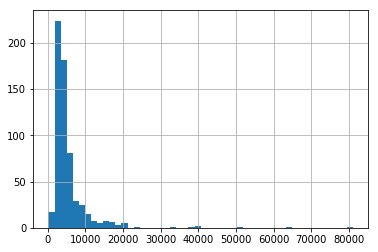

In [24]:
df['ApplicantIncome'].hist(bins=50)

Here we observe that there are few extreme values. This is also the reason why 50 bins are required to depict the distribution clearly.

Next, we look at box plots to understand the distributions. Box plot for fare can be plotted by:

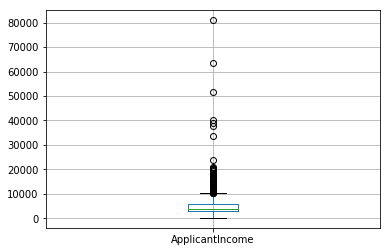

In [25]:
df.boxplot(column='ApplicantIncome')

This confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

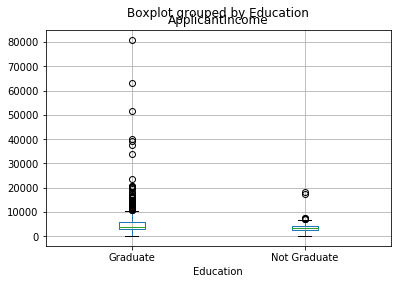

In [26]:
df.boxplot(column='ApplicantIncome', by = 'Education')

We can see that there is no substantial different between the mean income of graduate and non-graduates. But there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

Now, Let’s look at the histogram and boxplot of LoanAmount using the following command:

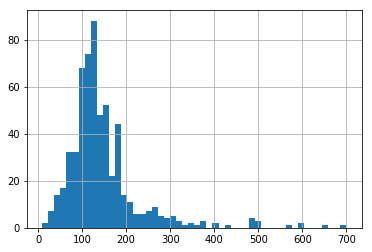

In [27]:
df['LoanAmount'].hist(bins=50)

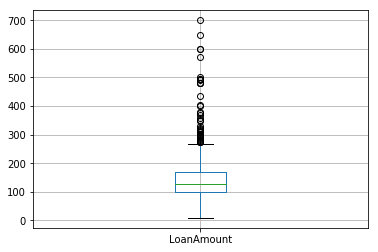

In [28]:
df.boxplot(column='LoanAmount')

Again, there are some extreme values. Clearly, both ApplicantIncome and LoanAmount require some amount of data munging. LoanAmount has missing and well as extreme values values, while ApplicantIncome has a few extreme values, which demand deeper understanding. We will take this up in coming sections.

## Categorical variable analysis

In [29]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:') 
print (temp1)

print ('\nProbility of getting loan for each Credit History class:')
print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


This can be plotted as a bar chart using the “matplotlib” library with following code:

Text(0.5, 1.0, 'Probability of getting loan by credit history')

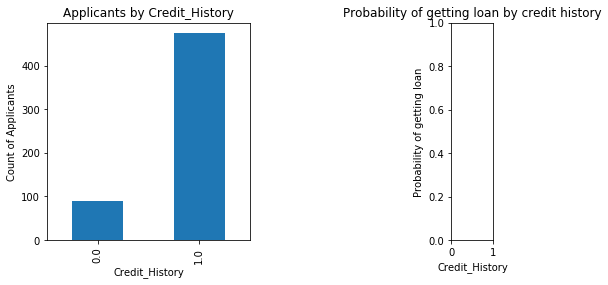

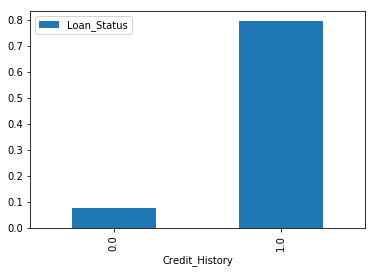

In [30]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(199)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

This shows that the chances of getting a loan are eight-fold if the applicant has a valid credit history. You can plot similar graphs by Married, Self-Employed, Property_Area, etc.

Alternately, these two plots can also be visualized by combining them in a stacked chart:

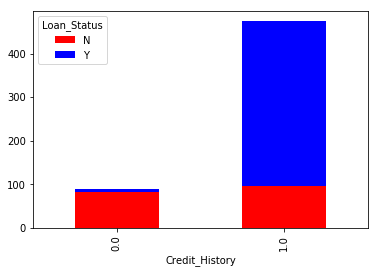

In [31]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

If you have not realized already, we have just created two basic classification algorithms here, one based on credit history, while other on 2 categorical variables (including gender). You can quickly code this to create your first submission on AV Datahacks.

We just saw how we can do exploratory analysis in Python using Pandas. I hope your love for pandas (the animal) would have increased by now – given the amount of help, the library can provide you in analyzing datasets.

Next let’s explore ApplicantIncome and LoanStatus variables further, perform data munging and create a dataset for applying various modeling techniques. I would strongly urge that you take another dataset and problem and go through an independent example before reading further.

## Separamos em variaveis de input e de output

In [50]:
array = df.values

X = array[:, 0:12]
Y = array[:, 12] #Loan_Status

Let us look at missing values in all the variables because most of the models don’t work with missing data and even if they do, imputing them helps more often than not. So, let us check the number of nulls / NaNs in the dataset

## Tratamento de dados Missing

In [51]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Preencher os dados faltantes com a média dos valores do atributo: Essa é a minha solução favorita e que iremos utilizar nesse guia. Em nosso problema iremos fazer isso da forma mais simples, aplicando o valor da média das colunas salário e bônus nos exemplos que não possuem esse valor. Notem que se quiséssemos poderíamos ir um pouco mais afundo e calcular essas médias de acordo com o cargo para depois aplicarmos a média que mais faz sentido. 

In [52]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [53]:
df['LoanAmount']

0      146.412162
1      128.000000
2       66.000000
3      120.000000
4      141.000000
5      267.000000
6       95.000000
7      158.000000
8      168.000000
9      349.000000
10      70.000000
11     109.000000
12     200.000000
13     114.000000
14      17.000000
15     125.000000
16     100.000000
17      76.000000
18     133.000000
19     115.000000
20     104.000000
21     315.000000
22     116.000000
23     112.000000
24     151.000000
25     191.000000
26     122.000000
27     110.000000
28      35.000000
29     120.000000
          ...    
584    146.000000
585    172.000000
586    104.000000
587     70.000000
588     94.000000
589    106.000000
590     56.000000
591    205.000000
592    292.000000
593    142.000000
594    260.000000
595    110.000000
596    187.000000
597     88.000000
598    180.000000
599    192.000000
600    350.000000
601    155.000000
602    128.000000
603    172.000000
604    496.000000
605    146.412162
606    173.000000
607    157.000000
608    108

In [54]:
# Verificando se ainda existe alguma variavel numerica com valores missing
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [55]:
X

array([['LP001002', 'Male', 'No', ..., 360.0, 1.0, 'Urban'],
       ['LP001003', 'Male', 'Yes', ..., 360.0, 1.0, 'Rural'],
       ['LP001005', 'Male', 'Yes', ..., 360.0, 1.0, 'Urban'],
       ...,
       ['LP002983', 'Male', 'Yes', ..., 360.0, 1.0, 'Urban'],
       ['LP002984', 'Male', 'Yes', ..., 360.0, 1.0, 'Urban'],
       ['LP002990', 'Female', 'No', ..., 360.0, 0.0, 'Semiurban']],
      dtype=object)

In [56]:
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N


## Variáveis categóricas



Outro problema do nosso dataset são as variáveis categóricas que nesse caso se restringem as colunas, gender, married, dependents, e Self_Employed, ou seja, uma variável categórica é uma variável nominal, sem escala, não numérica.

In [57]:
# Variaveis categorias: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Amount_Term, Credit_History, Loan_Status

In [58]:
# Variaveis categoricas com valores missing: Gender, Married, Dependents, Self_Employed, Loan_Amount_Term, Credity_HIstory

### Método get_dummies

Primeiro vamos criar um dataFrame para cada coluna de variavel categorica que vamos a tratar:

In [59]:
X_Gender = pd.DataFrame({'Gender':X[:,1]})
X_Married = pd.DataFrame({'Married':X[:,2]})
X_Dependents = pd.DataFrame({'Dependents':X[:,3]})
X_Education = pd.DataFrame({'Education':X[:,4]})
X_Self_Employed = pd.DataFrame({'Self_Employed':X[:,5]})
X_Loan_Amount_Term = pd.DataFrame({'Loan_Amount_Term':X[:,9]})
X_Credit_History = pd.DataFrame({'Credit_History':X[:,10]})
X_Property_Area = pd.DataFrame({'Property_Area':X[:,11]})

Agora vamos transformar o nosso dataFrame com uma coluna de variáveis categóricas em colunas que representam cada categoria:

In [60]:
X_Gender = pd.get_dummies(X_Gender)
X_Married = pd.get_dummies(X_Married)
X_Dependents = pd.get_dummies(X_Dependents)
X_Education = pd.get_dummies(X_Education)
X_Self_Employed = pd.get_dummies(X_Self_Employed)
X_Loan_Amount_Term = pd.get_dummies(X_Loan_Amount_Term)
X_Credit_History = pd.get_dummies(X_Credit_History)
X_Property_Area = pd.get_dummies(X_Property_Area)

In [61]:
X_Gender, X_Married, X_Dependents, X_Education, X_Self_Employed, X_Loan_Amount_Term, X_Credit_History, X_Property_Area

(     Gender_Female  Gender_Male
 0                0            1
 1                0            1
 2                0            1
 3                0            1
 4                0            1
 5                0            1
 6                0            1
 7                0            1
 8                0            1
 9                0            1
 10               0            1
 11               0            1
 12               0            1
 13               0            1
 14               0            1
 15               0            1
 16               0            1
 17               1            0
 18               0            1
 19               0            1
 20               0            1
 21               0            1
 22               0            1
 23               0            0
 24               0            1
 25               0            1
 26               0            1
 27               0            1
 28               0            1
 29       

Agora vamos extrair da variável X apenas as colunas com variáveis numéricas e transformar em um dataFrame

In [62]:
X

array([['LP001002', 'Male', 'No', ..., 360.0, 1.0, 'Urban'],
       ['LP001003', 'Male', 'Yes', ..., 360.0, 1.0, 'Rural'],
       ['LP001005', 'Male', 'Yes', ..., 360.0, 1.0, 'Urban'],
       ...,
       ['LP002983', 'Male', 'Yes', ..., 360.0, 1.0, 'Urban'],
       ['LP002984', 'Male', 'Yes', ..., 360.0, 1.0, 'Urban'],
       ['LP002990', 'Female', 'No', ..., 360.0, 0.0, 'Semiurban']],
      dtype=object)

In [65]:
X = X[:, 6:9] # ApplicantIncome, CoapplicantIncome, LoanAmount

In [66]:
X

array([[5849, 0.0, 146.41216216216216],
       [4583, 1508.0, 128.0],
       [3000, 0.0, 66.0],
       ...,
       [8072, 240.0, 253.0],
       [7583, 0.0, 187.0],
       [4583, 0.0, 133.0]], dtype=object)

In [67]:
X = pd.DataFrame({'ApplicantIncome':X[:,0], 'CoapplicantIncome':X[:,1], 'LoanAmount':X[:,2]})

In [68]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0,146.412
1,4583,1508,128
2,3000,0,66
3,2583,2358,120
4,6000,0,141
5,5417,4196,267
6,2333,1516,95
7,3036,2504,158
8,4006,1526,168
9,12841,10968,349


## Reescala dos dados

### Normalizacao

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

E uma das primeiras tarefas dentro do pré-processamento, é colocar seus dados na mesma escala. Muitos algoritmos de Machine Learning vão se beneficiar disso e produzir resultados melhores. Esta etapa também é chamada de normalização e significa colocar os dados em uma escala com range entre 0 e 1. Isso é útil para a otimização, sendo usado no core dos algoritmos de Machine Learning, como gradient descent. Isso também é útil para algoritmos como regressão e redes neurais e algoritmos que usam medidas de distância, como KNN. O scikit-learn possui uma função para esta etapa, chamada MinMaxScaler().

In [69]:
#valor = ( valor — Coluna.min) / (Coluna.max — Coluna.min)

In [70]:
# Importando o MinMaxScaler que nos ajudara a normalizar os dados.
from sklearn.preprocessing import MinMaxScaler

X_minMax = X.copy()
X_minMax[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] = MinMaxScaler().fit_transform(X[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])

X_minMax

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.070489,0.000000,0.198860
1,0.054830,0.036192,0.172214
2,0.035250,0.000000,0.082489
3,0.030093,0.056592,0.160637
4,0.072356,0.000000,0.191027
5,0.065145,0.100703,0.373372
6,0.027001,0.036384,0.124457
7,0.035696,0.060096,0.215630
8,0.047693,0.036624,0.230101
9,0.156970,0.263230,0.492041


Por fim vamos unir as colunas das variaveis categoricas com nosso dataframe X:

In [71]:
# X_Gender, X_Married, X_Dependents, X_Education, X_Self_Employed, X_Loan_Amount_Term, X_Credit_History, X_Property_Area

In [72]:
X = X.join(X_Gender), X.join(X_Married), X.join(X_Dependents), X.join(X_Education), X.join(X_Self_Employed), X.join(X_Loan_Amount_Term), X.join(X_Credit_History), X.join(X_Property_Area)

In [73]:
X = X_minMax.join(X_Gender)
X = X.join(X_Married)

In [74]:
X = X.join(X_Dependents)
X = X.join(X_Education)
X = X.join(X_Self_Employed)
X = X.join(X_Loan_Amount_Term)
X = X.join(X_Credit_History)
X = X.join(X_Property_Area)


In [75]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,...,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.070489,0.000000,0.198860,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
1,0.054830,0.036192,0.172214,0,1,0,1,0,1,0,...,0,0,0,1,0,0,1,1,0,0
2,0.035250,0.000000,0.082489,0,1,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,1
3,0.030093,0.056592,0.160637,0,1,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,1
4,0.072356,0.000000,0.191027,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
5,0.065145,0.100703,0.373372,0,1,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1
6,0.027001,0.036384,0.124457,0,1,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,1
7,0.035696,0.060096,0.215630,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
8,0.047693,0.036624,0.230101,0,1,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1
9,0.156970,0.263230,0.492041,0,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,1,0


Por conseguinte também vamos transformar a nossa variável Y (é sócio) em valores numéricos, onde sim será 1 e não será zero:

In [76]:
Y = pd.get_dummies(Y)
Y = Y['Y'].values

In [77]:
Y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

## Feature Selection

Os atributos presentes no seu dataset e que você utiliza nos dados de treino, terão grande influência na precisão e resultado do seu modelo preditivo. Atributos irrelevantes terão impacto negativo na performance, enquanto atributos colineares podem afetar o grau de acurácia do modelo. O Scikit-learn possui funções que automatizam o trabalho de extração e seleção de variáveis.

A etapa de Feature Selection é onde selecionamos os atributos (variáveis) que serão melhores candidatas a variáveis preditoras. O Feature Selection nos ajuda a reduzir o overfitting (quando o algoritmo aprende demais), aumenta a acurácia do modelo e reduz o tempo de treinamento.

### Selecionando os melhores atributos

Agora que temos nossos dados reescalados em alguns datasets podemos contar com muitas colunas/atributos para nos auxiliar na tarefa de predição, porém nem sempre todos esses atributos possuem informações relevantes e muita das vezes podem levar o modelo a ter um resultado inferior do que se tivéssemos usados apenas poucos atributos. Portanto um trabalho importante é selecionar os atributos que mais fazem sentido e agregam valor em nossa solução. Para isso podemos contar com o SelectKBest do sklearn, onde o K representa o número máximo de atributos que desejamos ter em nosso dataset a ser “inputado” em nossa etapa de treino, dado o K o SelectKBest trata de encontrar os K melhores atributos a serem usados. Importante ressaltar que aqui não existe uma melhor maneira de se escolher o valor para K a solução é tentar com diferentes valores e compararmos os resultados. Uma observação importante é que o SelectKBest não suporta dados valores negativos, portanto todos os métodos de reescala que transformam os valores em um intervalo que possui negativos devem ser descartados caso você queira aplica-lo. Em nosso exemplo irei experimentar K = 6 pois possuímos 8 atributos e irei utilizar o método de reescala MinMaxScaler, sinta-se à vontade para experimentar qualquer valor de K e qualquer método de reescala! O método fit_transform já nos retorna os valores dos atributos mais importantes por tanto podemos passar a usar o retorno como o nosso novo X

In [81]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Função para seleção de variáveis
best_var = SelectKBest(score_func = chi2, k = 8)

# Executa a função de pontuação em (X, y) e obtém os recursos selecionados
fit = best_var.fit(X, Y)

# Reduz X para os recursos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de features:', X.shape[1])
print('\nNúmero reduzido de features:', features.shape[1])
print('\nFeatures (Variáveis Selecionadas): \n\n', features)


Número original de features: 30

Número reduzido de features: 8

Features (Variáveis Selecionadas): 

 [[1. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]]


In [82]:
# Eliminação Recursiva de Variáveis

# Import dos módulos
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Criação do modelo
modelo = LogisticRegression()

# RFE
rfe = RFE(modelo, 3)
fit = rfe.fit(X, Y)

# Print dos resultados
print("Variáveis Preditoras:", X)
print("Variáveis Selecionadas: %s" % fit.support_)
print("Ranking dos Atributos: %s" % fit.ranking_)
print("Número de Melhores Atributos: %d" % fit.n_features_)

Variáveis Preditoras:      ApplicantIncome  CoapplicantIncome  LoanAmount  Gender_Female  \
0           0.070489           0.000000    0.198860              0   
1           0.054830           0.036192    0.172214              0   
2           0.035250           0.000000    0.082489              0   
3           0.030093           0.056592    0.160637              0   
4           0.072356           0.000000    0.191027              0   
5           0.065145           0.100703    0.373372              0   
6           0.027001           0.036384    0.124457              0   
7           0.035696           0.060096    0.215630              0   
8           0.047693           0.036624    0.230101              0   
9           0.156970           0.263230    0.492041              0   
10          0.037724           0.016800    0.088278              0   
11          0.029066           0.044160    0.144718              0   
12          0.036153           0.194542    0.276411              0  

## Redução de Dimensionalidade (Feature Extraction)

## Principal Component Analysis (PCA)

O PCA foi inventado em 1901 por Karl Pearson e utiliza álgebra linear para transformar datasets em uma forma comprimida, o que é geralmente conhecido como Redução de Dimensionalidade. Com PCA você pode escolher o número de dimensões (chamados componentes principais) no resultado transformado. Vamos usar PCA para selecionar 3 componentes principais.

A Análise de Componentes Principais (PCA) é um método para extração das variáveis importantes (na forma de componentes) a partir de um grande conjunto de variáveis, disponíveis em um conjunto de dados. Esta técnica permite extrair um número pequenos de conjuntos dimensionais a partir de um dataset altamente dimensional. Com menos variáveis a visualização também se torna muito mais significativa. PCA é mais útil quando se lida com 3 ou mais dimensões.

Cada componente resultante é uma combinação linear de n atributos. Ou seja, cada componente principal é uma combinação de atributos presentes no dataset. O Primeiro Componente Principal é a combinação linear dos atributos com máxima variância e determina a direção em que há mais alta variabilidade nos dados. Quanto maior a variabilidade capturada no primeiro componente principal, mais informação será capturada pelo componente. O Segundo Componente Principal captura a variabilidade remanescente. Todos os componentes subsequentes possuem o mesmo conceito.

In [85]:
# Feature Extraction

# Import dos módulos
from sklearn.decomposition import PCA

# Seleção de atributos
pca = PCA(n_components = 3)
fit = pca.fit(X_minMax)

# Sumarizando os componentes
print("Variância: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Variância: [0.67907745 0.21647095 0.1044516 ]
[[ 0.40370696  0.09802568  0.90962171]
 [-0.48535678  0.86574664  0.12211285]
 [ 0.77553175  0.49078887 -0.39708537]]


## Amostragem - Resampling

Você precisa saber se seu modelo preditivo vai funcionar bem quando receber novos dados. A melhor maneira de avaliar a performance do modelo é fazer previsões em dados que você já conhece o resultado. Outra maneira de testar a performance do seu modelo é utilizar técnicas estatísticas como métodos de amostragem que permitem você estimar quão bem seu modelo irá fazer previsões em novos dados.

A avaliação do modelo é uma estimativa de quão bem o algoritmo será capaz de prever em novos dados. Isso não garante performance. Após avaliar o modelo, nós podemos treiná-lo novamente com os dados de treino e então prepará-lo para uso operacional em produção. Existem diversas técnicas para isso e estudaremos duas aqui: Conjunto de dados de treino e de teste e Cross Validation.

### Dados de Treino e de Teste

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Este é o método mais utilizado para avaliar performance de um algoritmo de Machine Learning. Dividimos nossos dados originais em dados de treino e de teste. Treinamos o algoritmo nos dados de treino e fazemos as previsões nos dados de teste e avaliamos o resultado. A divisão dos dados vai depender do seu dataset, mas utiliza-se com frequência tamanhos entre 70/30 (treino/teste) e 65/35 (treino/teste).

Este método é bem veloz e ideal para conjuntos de dados muito grandes. O ponto negativo é a possibilidade de alta variância.

In [86]:
# Avaliação usando dados de treino e de teste

# Import dos módulos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Definindo o tamanho das amostras
teste_size = 0.33

# Garante que os resultados podem ser reproduzidos
# Isso é importante para comparar a acurácia com outros algoritmos de Machine Learning.
seed = 7

# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

# Criação do modelo
modelo = LogisticRegression()

# Treinamento do modelo
modelo.fit(X_treino, Y_treino)

# Score do modelo nos dados de teste
result = modelo.score(X_teste, Y_teste)
print("Acurácia nos Dados de Teste: %.3f%%" % (result * 100.0))

Acurácia nos Dados de Teste: 80.296%


### Cross Validation

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

Cross Validation é uma técnica que pode ser utilizada para avaliar a performance de um modelo com menos variância que a técnica de dividir os dados em treino/teste. Com esta técnica dividimos os dados em partes normalmente chamadas de k-folds (por exemplo k = 5, k = 10). Cada parte é chamada fold. O algoritmo é treinado em k-1 folds. Cada fold é usado no treinamento de forma repetida e um fold por vez. Após executar o processo em k-1 folds, podemos sumarizar a performance em cada fold usando a média e o desvio padrão (Eu disse que Estatística era importante no processo de Big Data Analytics). O resultado é normalmente mais confiável e oferece maior acurácia ao modelo. A chave deste processo está em definir o correto valor de k, de modo que o número de folds represente adequadamente o número de repetições necessárias.

In [87]:
# Avaliação usando Cross Validation

# Import dos módulos
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Definindo os valores para os folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = LogisticRegression()
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Final: %.3f%%" % (resultado.mean() * 100.0))

Acurácia Final: 80.457%


# Seleção do Modelo Preditivo

Veremos que os algoritmos de Regressão Logística e Linear Discriminant Analysis apresentaram o melhor nível de precisão.

LR: 0.806372 (0.039844)
LDA: 0.806425 (0.041507)
NB: 0.317451 (0.031163)
KNN: 0.768905 (0.043028)
CART: 0.708435 (0.044069)
SVM: 0.809598 (0.035573)


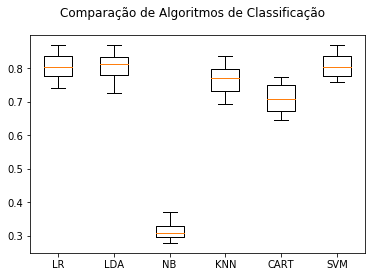

In [88]:
# Import dos módulos
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Preparando a lista de modelos
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('SVM', SVC()))

# Avaliando cada modelo em um loop
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

# Salvando o resultado do seu trabalho

In [90]:
# Importando modulo
import pickle

# Salvando o modelo
arquivo = 'modelos/modelo_classificador_final.sav'
pickle.dump(modelo, open(arquivo, 'wb'))
print("Modelo salvo!")

# Carregando o arquivo
modelo_classificador_final = pickle.load(open(arquivo, 'rb'))
modelo_prod = modelo_classificador_final.score(X_teste, Y_teste)
print("Modelo carregado!")

# Print do resultado
print("Acurácia: %.3f" % (modelo_prod.mean() * 100))

FileNotFoundError: [Errno 2] No such file or directory: 'modelos/modelo_classificador_final.sav'